# CS145 Howework 4


<span style="color:red"> **Important Note:** </span>
HW4 is due on **11:59 PM PT, Nov 20 (Friday, Week 7)**. Please submit through GradeScope. 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Kevin Li, UID: XXXXXXXXX** </span>

## Before You Start

You need to first create HW4 conda environment by the given `cs145hw4.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw4.yml
conda activate hw4
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw4.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as some important hyperparameters) that you are allowed to edit (between STRART/END YOUR CODE HERE), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [1]:
import numpy as np 
import pandas as pd
import sys 
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%load_ext autoreload
%autoreload 2

If you can successfully run the code above, there will be no problem for environment setting.

## 1. Clustering Evaluation
This workbook will walk you through an example for calculating different clustering metrics. 

<span style="color:red"> Note: This is a "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator). </span>

**Questions**


Suppose we want to cluster the following 20 conferences into four areas, with ground truth label and algorithm output label shown in third and fourth column. Please evaluate the quality of the clustering algorithm according to four different metrics respectively.<img src="conferences.png"  width="600"/>


**Questions (please include intermediate steps)**



1. Calculate purity.
2. Calculate precision.
3. Calculate recall.
4. Calculate F1-score.
5. Calculate normalized mutual information.

**Your answer here:**


<span style="color:red"> Note: you can use several code cells to help you compute the results and answer the questions. Again you don't need to do any coding. </span>

<span style="color:blue"> Please type your answer here! </span>

In [29]:
Y = [3, 3, 1, 1, 1, 4, 3, 3, 4, 2, 4, 2, 1, 2, 3, 2, 1, 2, 4, 4]
Yhat = [2, 2, 3, 3, 3, 4, 2, 2, 3, 1, 4, 1, 3, 1, 2, 1, 2, 1, 4, 4]

for cluster in range(1, 5):
    for y, yhat in zip(Y, Yhat):
        if yhat == cluster:
            print(f'Cluster {cluster}. True label {y}')
    print()

Cluster 1. True label 2
Cluster 1. True label 2
Cluster 1. True label 2
Cluster 1. True label 2
Cluster 1. True label 2

Cluster 2. True label 3
Cluster 2. True label 3
Cluster 2. True label 3
Cluster 2. True label 3
Cluster 2. True label 3
Cluster 2. True label 1

Cluster 3. True label 1
Cluster 3. True label 1
Cluster 3. True label 1
Cluster 3. True label 4
Cluster 3. True label 1

Cluster 4. True label 4
Cluster 4. True label 4
Cluster 4. True label 4
Cluster 4. True label 4



## 1

Purity is $\frac{1}{N} \sum_{k} \max_j |c_k \cap \omega_j|$

$N = 20$ since we have 20 points

For output cluster 1, we have true labels 2, 2, 2, 2 and 2 so all five are correct

For output cluster 2, we have true labels 3, 3, 3, 3, 3, 1 so five out of six are correct

For output cluster 3, we have true labels 1, 1, 1, 1, 4 so four out of five are correct

For output cluster 4, we have all true labels 4 so all four are correct

So, $\sum_{k} \max_j |c_k \cap \omega_j| = 5+5+4+4 = 18$

Purity is $\frac{18}{20} = 0.9$

In [31]:
n = len(Y)
tp, fp, fn, tn = 0, 0, 0, 0
for i in range(n):
    for j in range(i + 1, n):
        if Y[i] == Y[j]:
            if Yhat[i] == Yhat[j]:
                tp += 1
            else:
                fn += 1
        else:
            if Yhat[i] == Yhat[j]:
                fp += 1
            else:
                tn += 1

print(tp, fp, tn, fn)

32 9 141 8


## 2

$Precision = TP/(TP+FP)$

$TP = 32$,
$FP = 9$

$Precision = 32/41 \approx 0.78$

## 3

$Recall = TP/(TP+FN)$

$TP = 32$
$FP = 8$

$Recall = 32/40 = 0.80$

## 4

$F_1 = 2 \cdot Precision \cdot Recall / (Precision + Recall)$

$F_1 = 2 \cdot .78 \cdot .8 / (.78 + .8)$

$F_1 \approx 0.79$

## 5

NMI Table:

|     | C1 | C2 | C3 | C4 | Sum |
|-----|----|----|----|----|-----|
| L1  | 0  | 1  | 4  | 0  | 5   |
| L2  | 5  | 0  | 0  | 0  | 5   |
| L3  | 0  | 5  | 0  | 0  | 5   |
| L4  | 0  | 0  | 1  | 4  | 5   |
| Sum | 5  | 6  | 5  | 4  | 20  |

We then apply the NMI formula

$$ NMI(C, \Omega) = \frac{I(C, \Omega)}{\sqrt{H(C) H(\Omega)}} $$

To get $I(C, \Omega)$, we calculate the following:

$$ \sum_k \sum_j \frac{|c_k \cap \omega_j|}{N} \ln \frac{N |c_k \cap \omega_j|}{|c_k| \cdot |\omega_j|}$$

To get $H(\Omega)$, we calculate the following:

$$ \sum_j \frac{|\omega_j|}{N} \ln \frac{|\omega_j|}{N} $$

To get $H(C)$, we calculate the following:

$$ \sum_k \frac{|c_k|}{N} \ln \frac{|c_k|}{N} $$

Once we calculate the values for $I, H_\Omega$ and $H_C$, we get the following:

$I(C, \Omega) \approx 1.13$

$H(\Omega) = \frac{5}{20} \ln \frac{5}{20} + \frac{5}{20} \ln \frac{5}{20} + \frac{5}{20} \ln \frac{5}{20} + \frac{5}{20} \ln \frac{5}{20} \approx -1.39$

$H(\Omega) = \frac{5}{20} \ln \frac{5}{20} + \frac{6}{20} \ln \frac{6}{20} + \frac{5}{20} \ln \frac{5}{20} + \frac{4}{20} \ln \frac{4}{20} \approx -1.38$

Once calculated, we combine them and get

$$ NMI(C, \Omega) \approx 0.82 $$ 

## 2. K-means

In this section, we are going to apply K-means algorithm against two datasets (dataset1.txt, dataset2.txt) with different distributions, respectively. 


For each dataset, it contains 3 columns, with the format: x1 \t x2 \t cluster_label. You need to use the first two columns for clustering, and the last column for evaluation.


In [3]:
from hw4code.KMeans import KMeans
k = KMeans()
# As a sanity check, we print out a sample of each dataset
dataname1 = "data/dataset1.txt"
dataname2 = "data/dataset2.txt"
k.check_dataloader(dataname1)
k.check_dataloader(dataname2)


For dataset1: number of datapoints is 150
          x         y  ground_truth_cluster
0 -0.163880 -0.219869                     1
1 -0.886274 -0.356186                     1
2 -0.978910 -0.893314                     1
3 -0.658867 -0.371122                     1
4 -0.072518  0.399157                     1

For dataset2: number of datapoints is 200
          x         y  ground_truth_cluster
0  1.068587  0.136921                     1
1  0.705440  0.393068                     1
2  0.840811 -0.054906                     1
3 -0.923447  0.598501                     1
4  0.784353  0.724743                     1


### 2.1 Coding K-means

Complete the `reassignClusters` and `getCentroid` function in `KMeans.py`. 

Print out each output cluster's size and centroid（x,y) for dataset1 and dataset2 respectively.

In [16]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main(dataname1)
k.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :3
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232993]
Cluster 1 size :50
Centroid [x=-0.4633368646347212, y=-0.46611409698195794]
Cluster 2 size :50
Centroid [x=0.9888766205736857, y=2.010478965197201]

For dataset2
Iteration :4
Cluster 0 size :102
Centroid [x=1.2708406269481844, y=-0.08583389704900128]
Cluster 1 size :98
Centroid [x=-0.2018593506236788, y=0.5726963240559536]


### 2.2 Purity and NMI Evaluation

Complete the `compute_purity` function in `KMeans.py`. 

In order to compute NMI, you need to firstly compute NMI matrix and then do the calculation. That is to complete the `getNMIMatrix` and `calcNMI` functions in `KMeans.py`.

Print out the purity and NMI for each dataset respectively.

In [33]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main(dataname1, isevaluate=True)
k.main(dataname2, isevaluate=True)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :3
Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232993]
Cluster 1 size :50
Centroid [x=-0.4633368646347212, y=-0.46611409698195794]
Cluster 2 size :50
Centroid [x=0.9888766205736857, y=2.010478965197201]

For dataset2
Iteration :4
Purity is 0.760000
NMI is 0.205096
Cluster 0 size :102
Centroid [x=1.2708406269481844, y=-0.08583389704900128]
Cluster 1 size :98
Centroid [x=-0.2018593506236788, y=0.5726963240559536]


### 2.3 Visualization

The clustering results for KMeans are saved as `KMeans_dataset1.csv` and `KMeans_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

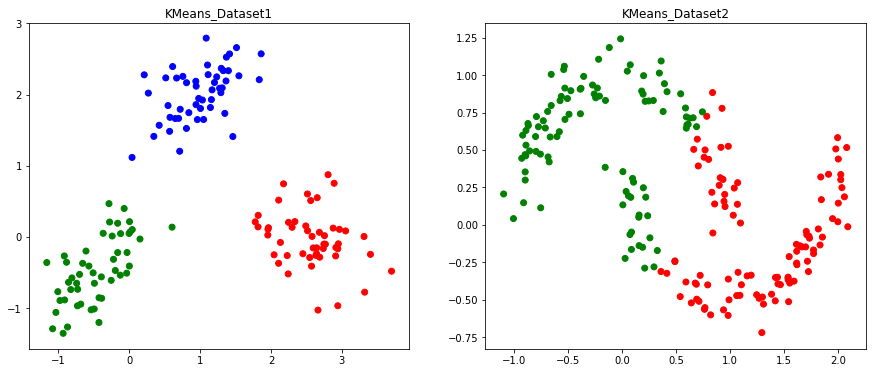

In [45]:
CSV_FILE_PATH1 = 'Kmeans_dataset1.csv'
CSV_FILE_PATH2 = 'Kmeans_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("KMeans_Dataset1")
ax1.title.set_text("KMeans_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#

colors = np.array(['r', 'g', 'b', 'orange'])
ax0.scatter(df1.x, df1.y, color=colors[df1.pred])
ax1.scatter(df2.x, df2.y, color=colors[df2.pred])

#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    

**Question** 


Give the pros and cons of K-means algorithm. (At least one for pro and two for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

## Pros

K-means is quick to train, taking $O(tkn)$ time where $n$ is the number of points, $k$ is the number of clusters, and $t$ is the number of iterations. Generally, $k$ and $t$ are normally far less than $n$ as well.

Additionally, K-means is simple to implement and understand

## Cons

K-means can only be applied to continuous spaces (k-modes must be used for categorial data)

Very poor at discovering non-convex shapes (as we just showed!)

## 3 DBSCAN

In this section, we are going to use DBSCAN for clustering the same two datasets. 



### 3.1 Coding DBSCAN

Complete the `dbscan` function in `DBSCAN.py`. Print out the purity, NMI and cluter size for each dataset respectively.

In [41]:
from hw4code.DBSCAN import DBSCAN
d = DBSCAN()
#========================#
# STRART YOUR CODE HERE  #
#========================#
d.main(dataname1)
d.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Esp :0.3560832705047313
Number of clusters formed :4
Noise points :11
Purity is 0.940000
NMI is 0.959065
Cluster 0 size :49
Cluster 1 size :41
Cluster 2 size :47
Cluster 3 size :4

For dataset2
Esp :0.18652096476712493
Number of clusters formed :3
Noise points :3
Purity is 0.985000
NMI is 0.817349
Cluster 0 size :99
Cluster 1 size :51
Cluster 2 size :47


### 3.2 Visualization

The clustering results for DBSCAN are saved as `DBSCAN_dataset1.csv` and `DBSCAN_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

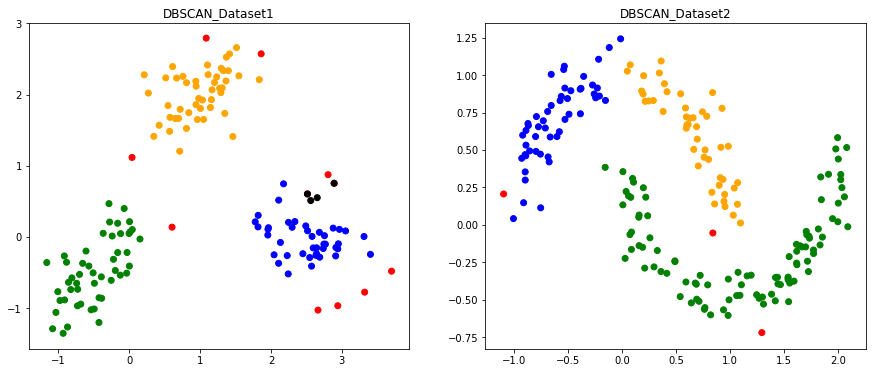

In [44]:
CSV_FILE_PATH1 = 'DBSCAN_dataset1.csv'
CSV_FILE_PATH2 = 'DBSCAN_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("DBSCAN_Dataset1")
ax1.title.set_text("DBSCAN_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#

colors = np.array(['r', 'g', 'b', 'orange', 'black'])
ax0.scatter(df1.x, df1.y, color=colors[df1.pred])
ax1.scatter(df2.x, df2.y, color=colors[df2.pred])

#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    

**Question** 


Give the pros and cons of DBSCAN algorithm. (At least two for pro and one for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

## Pros

DBSCAN can perform well discovering non-convex shapes (as demonstrated above)

DBSCAN is also very resilient to noise

## Cons

Since $\epsilon$ must be chosen, it may be very hard to find a reasonable value for it if one doesn't know the scale of the features

Additionally, $\epsilon$ and $minPts$ are static values; therefore, clusters with different densities cannot easily and correctly both be identified by DBSCAN.

One last issue that exists for any model that uses a distance metric such as Euclidean is the curse of dimensionality which essentially makes the distance between data points very precise (they almost all end up around the same values) making selection of $\epsilon$ virtually impossible

## 4 GMM

In this section, we are going to use GMM for clustering the same two datasets. 



### 4.1 Coding GMM

Complete the `Estep` and 'Mstep' function in `GMM.py`. Print out the purity, NMI, final mean, covariance and cluter size for each dataset respectively.

In [64]:
from hw4code.GMM import GMM
g = GMM()
#========================#
# STRART YOUR CODE HERE  #
#========================#
g.main(dataname1)
g.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Number of Iterations = 22

After Calculations
Final mean = 
-0.46247285694404044 
-0.4638749980764899 

0.9898929396029765 
2.011802723814242 

2.57342634413319 
-0.027108746076609493 


Final covariance = 
For Cluster : 1
0.14918910487220216 
0.1173463005433889 

0.1173463005433889 
0.215548612531075 


For Cluster : 2
0.16028233507625483 
0.07486967581052754 

0.07486967581052754 
0.13939774162738802 


For Cluster : 3
0.18039223672749394 
-0.04672614559811056 

-0.04672614559811056 
0.15206459963738586 


Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Cluster 1 size :50
Cluster 2 size :50

For dataset2
Number of Iterations = 95

After Calculations
Final mean = 
0.7464905663922625 
0.45649665848541027 

0.28287851889390897 
-0.05970560727188742 


Final covariance = 
For Cluster : 1
0.7692790765358334 
-0.28782809642382123 

-0.28782809642382123 
0.1901249384356512 


For Cluster : 2
0.6828574757628687 
-0.30058915994390495 

-0.30058915994390495 
0.1758355948512

### 4.2 Visualization

The clustering results for GMM are saved as `GMM_dataset1.csv` and `GMM_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

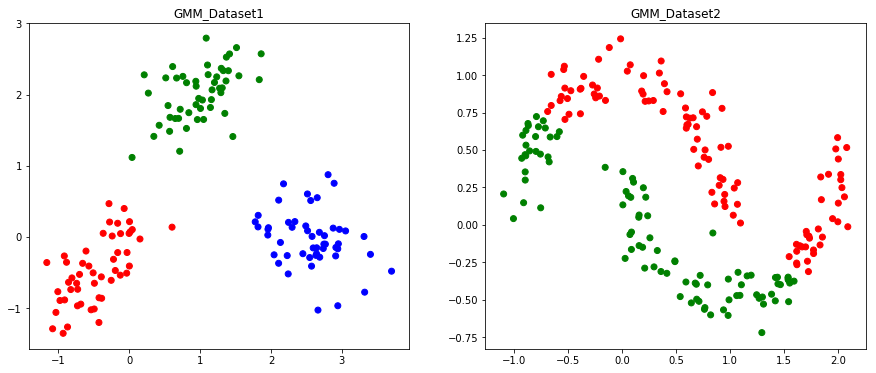

In [65]:
CSV_FILE_PATH1 = 'GMM_dataset1.csv'
CSV_FILE_PATH2 = 'GMM_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("GMM_Dataset1")
ax1.title.set_text("GMM_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#

colors = np.array(['r', 'g', 'b', 'orange', 'black'])
ax0.scatter(df1.x, df1.y, color=colors[df1.pred])
ax1.scatter(df2.x, df2.y, color=colors[df2.pred])

#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    


**Questions**



1. Give the pros and cons of GMM algorithm. (At least two for pro and two for cons to get full marks)
2. Compare the visualization results from three algorithms, analyze for each dataset why these algorithms would produce such result.

**Your answer here:**


<span style="color:blue"> Please type your answer here! </span>

## Pros of GMM

One pro of mixture models is that they can generalize different densities and different cluster sizes simultaneously

Another pro is that is is a simple model with only a few (and fairly explainable) parameters

## Cons of GMM

GMM can only create round circular/ovalish shapes.

It is also computationally expensive to train if there are many distributions

## Reasoning over dataset1

All three models do fairly well. This makes sense, because all three clusters are consistently dense (good for DBSCAN), have similarly sized clusters (good for K-means), and have roughly circular/oval shaped clusters (good for K-means and GMM)

## Reasoning over dataset2

We see GMM and K-means doing pretty poorly while DBSCAN performs excellently. This make sense, becuase the shapes are non-convex, oblong, non-circular shapes. Thus K-means and GMM will struggle significantly to cluster them while DBSCAN can do a good job since the data has a nice, consistent density in the clusters.

## 5 Bonus Question

Prove that KMeans algorithm would guarantee covergence. (**Hint: prove for each step the loss would descrease.**)

<span style="color:blue">

In the first step, we fix the centers and find the assignment of $w_{ij}$ that minimizes $J$. If there is no better assignment, we leave the assignments as they are.<br>
We note that the only way $J$ changes is if the cluster label of a point changes. If it does, then we know $J$ will decrease because we only change if we can pick an assignment for which the $J_i$ for that point $i$ decreases (and then we pick the label that maximally decreases $J_i$).

In the second step, we fix the assignments of the points $w_{ij}$, but then find centers for the clusters that minimize $J$. We note that the solution to this is closed; we can simply set $\frac{\partial J}{\partial c_j} = 0$. So, we will prove now that when doing this, we end up with the solution we run (where we recenter the clusters based on their center of mass). Thus, we're minimizing $J$ and therefore either decreasing it or leaving it the same.

$$J = \sum_{j=1}^k \sum_i w_{ij} || x_i - c_j || ^2$$
$$\frac{\partial J}{\partial c_j} = -2 \sum_i w_{ij} (x_i - c_j)$$

Setting the derivative equal to zero, we get

$$0 = -2 \sum_i w_{ij} (x_i - c_j)$$
$$c_j = \frac{\sum_i w_{ij} x_i}{\sum_i w_{ij}}$$

This is precisely what we do; therefore in step two we minimize $J$ again and monotonically decrease it.

</span>

# End of Homework 4 :)
After you've finished the homework, please print out the entire `ipynb` notebook and four `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Also this time remember assign the pages to the questions on GradeScope